In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, date
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import lognorm, norm, triang

start = date(1950,1,1)
end = datetime.today()

fred_series = {'yield02':  'WGS2YR',
               'yield30': 'WGS30YR'}


df = web.DataReader(fred_series.values(), 'fred', start, end)
df.columns = fred_series.keys()
df.index.name = 'date'
df.dropna(inplace=True)
spreadName = "spread" + df.columns[1][5:] + "_" + df.columns[0][5:]
df[spreadName] = df[df.columns[1]] - df[df.columns[0]]
df

,yield02,yield30,spread30_02
date,,,
1977-02-18,6.03,7.70,1.67
1977-02-25,6.14,7.80,1.66
1977-03-04,6.11,7.81,1.70
1977-03-11,6.12,7.82,1.70
1977-03-18,6.08,7.78,1.70
...,...,...,...
2022-08-05,3.07,2.98,-0.09
2022-08-12,3.24,3.06,-0.18
2022-08-19,3.24,3.14,-0.10


In [2]:
df.spread30_02.min()

-2.6099999999999994

In [3]:
sprd_chg = df[spreadName].diff()
sprd_chg.dropna(inplace=True)
sprd_chg

date
1977-02-25   -1.000000e-02
1977-03-04    4.000000e-02
1977-03-11    8.881784e-16
1977-03-18    0.000000e+00
1977-03-25    1.000000e-02
                  ...     
2022-08-05   -1.700000e-01
2022-08-12   -9.000000e-02
2022-08-19    8.000000e-02
2022-08-26    2.000000e-02
2022-09-02   -8.000000e-02
Freq: W-FRI, Name: spread30_02, Length: 2376, dtype: float64

In [4]:
sprd_chg.describe()

count    2376.000000
mean       -0.000770
std         0.104793
min        -0.860000
25%        -0.050000
50%         0.000000
75%         0.050000
max         0.810000
Name: spread30_02, dtype: float64

/Users/catweazle/anaconda3/envs/yc/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/catweazle/anaconda3/envs/yc/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genhyperbolic,18.170040,643.803471,-11540.331548,inf,0.037558,0.002389
t,18.226218,634.716889,-11548.543145,inf,0.037958,0.002070
johnsonsu,18.582597,658.828426,-11494.760182,inf,0.040065,0.000946
tukeylambda,18.737455,644.383195,-11482.814974,inf,0.042844,0.000316
hypsecant,18.949267,959.661031,-11463.880142,inf,0.042771,0.000325


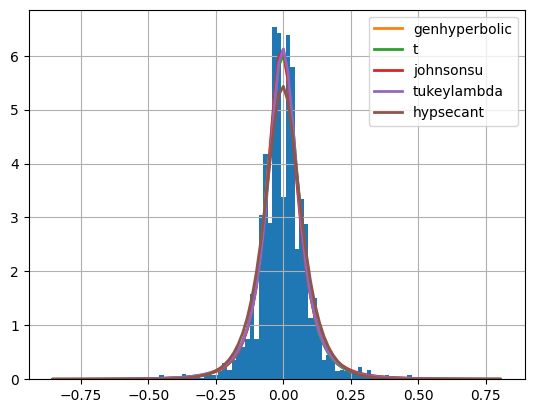

In [5]:
f = Fitter(sprd_chg,
          distributions=get_distributions())
f.fit()
f.summary()

In [6]:
best = f.get_best(method = 'sumsquare_error')
best_distro = list(best.keys())[0]
best_distro

'genhyperbolic'

In [10]:
best

{'genhyperbolic': {'p': -1.3572306046057185,
  'a': 0.14141039404642797,
  'b': 0.05155650182880829,
  'loc': -0.006438955808794371,
  'scale': 0.09975785728176467}}

In [8]:
f.fitted_param

{'anglit': (-0.02494775016946236, 1.0641003424232751),
 'bradford': (1.1149870481472433, -0.8600000321508279, 1.6700006320204435),
 'beta': (126634.69892859102,
  135141.4643811657,
  -51.89445099217147,
  107.27335227156537),
 'cauchy': (-0.003758381651481614, 0.04479682618286397),
 'arcsine': (-0.8599999999999978, 1.670001922868005),
 'cosine': (3.171480858685459, 1.380689415570752e-30),
 'argus': (2.1450461769956263e-05, -0.8619940751563422, 1.6722117479767122),
 'alpha': (42.1022641092662, -4.486787762314684, 188.77799708894668),
 'chi2': (386.2116810611187, -1.536445664764571, 0.003979923720089349),
 'chi': (406.29700623295184, -2.998698814917951, 0.14879382429002758),
 'expon': (-0.8599999999999977, 0.8592297979797956),
 'betaprime': (5.0042743788564765,
  335269978.2733103,
  -0.8631284214745198,
  63414921.805258065),
 'exponnorm': (0.5921991845501735, -0.052411166346219534, 0.0872039191844853),
 'dgamma': (0.8845985181488527, 5.696170292014867e-32, 0.07848247047088366),
 'expo

In [9]:
list(distro.keys())[0]

NameError: name 'distro' is not defined

In [ ]:
randos = lognorm.rvs()